<a href="https://colab.research.google.com/github/Khey17/100-Days-Of-ML-Code/blob/main/Neural_Network_Regression_with_TensorFlow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a continuous value based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating data to view and fit

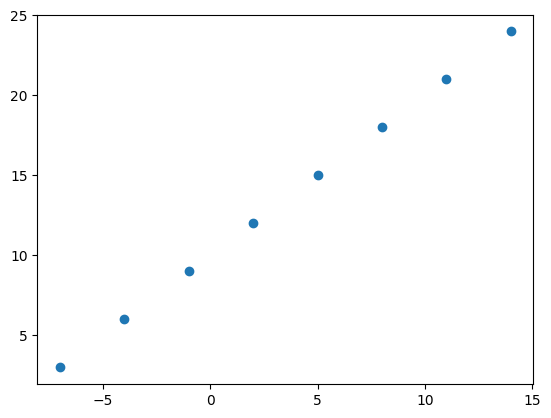

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
# y = X + 10
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [4]:
# Create a demo tensor for our housing prediction problem
house_info = tf.constant(['bedroom', 'bedroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bedroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0].ndim

0

In [7]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

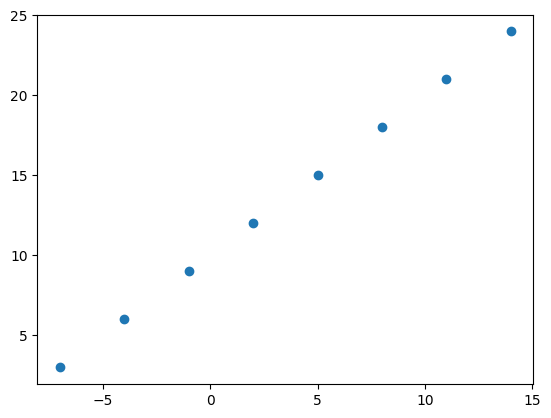

In [9]:
plt.scatter(X, y)

### Steps in modelling with TensorFlow

1. **Creating a model** - defing the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 507ms/step - loss: 13.3920 - mae: 13.3920
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 13.2595 - mae: 13.2595
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 13.1270 - mae: 13.1270
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 12.9945 - mae: 12.9945
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 12.8620 - mae: 12.8620


In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 99ms/step


array([[3.5494587]], dtype=float32)

### Improve the model

We can improve our model, by altering the steps we took to create a model

1. **Create a model** - here we might add more layers, increase the no. of hidden layers, change the activation func of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization func.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [13]:
# Let's rebuild our model
tf.random.set_seed(42)

# 1. Create a model (Specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 935ms/step - loss: 13.9378 - mae: 13.9378
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.2572 - mae: 11.2572
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 8.7432 - mae: 8.7432
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 4.6900 - mae: 4.6900
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 6.7058 - mae: 6.7058
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.3179 - mae: 8.3179
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 6.8506 - mae: 6.8506
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 4.7121 - mae: 4.7121
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 3.8104 - mae: 3.8104
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 5.3059 - mae: 5.3059
Epoch 11/100
1/1 [==============================] - 0s 10ms/step 

In [14]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 88ms/step


array([[26.785055]], dtype=float32)

### Common ways to improve a Deep Learning model
- Adding Layers
- Increase the number of hidden units
- Change the activation function of each layer
- Change the optimization function
- Change the learning rate of the optimization function
- Fitting on more data
- Fitting for longer

### Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> Fit it -> evaluate it -> tweak a model -> fit it -> tweak a model -> fit it...
```

When it comes to evaluation.. there are 3 words you should memorize:

> "Visualize, Visualize,..."

It's a good idea to visualize:
* The data - what data are working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [16]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)

# Make labels for the dataset
Y = X + 10

X, Y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

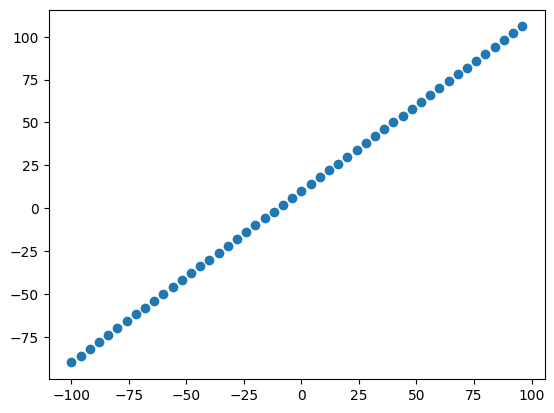

In [17]:
# Visualize the data
plt.scatter(X, Y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70%-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [18]:
### Split the data into train and test sets
X_train = X[:40]
y_train = Y[:40]

X_test = X[40:]
y_test = Y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize the data
Now we've got our data in training and test sets... let's visualize it again!

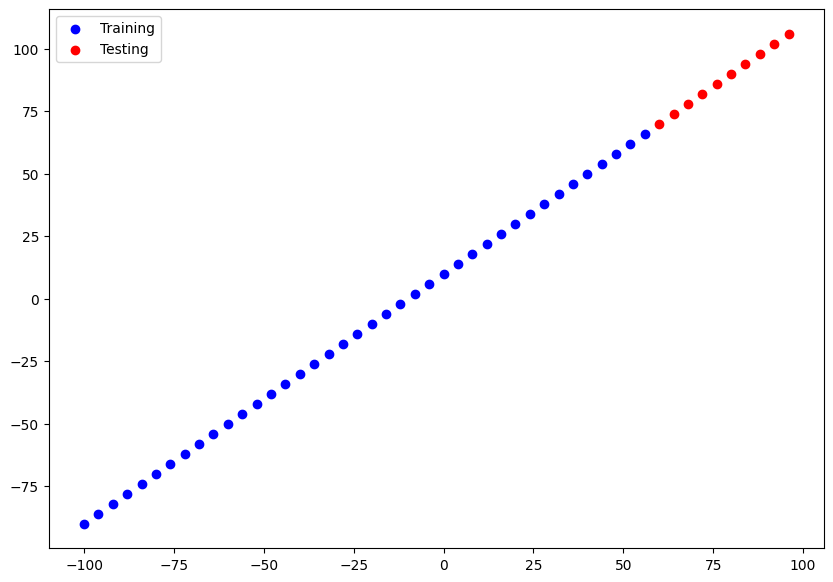

In [19]:
plt.figure(figsize=(10, 7))

# Plot training in blue
plt.scatter(X_train, y_train, c="b", label="Training")
# Plot validation in red
plt.scatter(X_test, y_test, c="r", label="Testing")
# Show a legend
plt.legend();

In [20]:
# Let's look at how to build a neural network for our data

tf.random.set_seed(42)

# 1. Create a model (Specified to your problem)
model_1 = tf.keras.Sequential([
    # tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model_1
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

# # 3. Fit the model_1
# model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualize our model

In [22]:
model_1.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [23]:
# Build our model
model_1.build(input_shape=(None, 1))
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (Specified to your problem)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, input_shape=[1], name='output_layer')
], name='model_2')

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

In [25]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 128)               256       
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total no. of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params- these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

📖**Resource:** For more in-depth overview of the trainable parameters with a layer, check out [MIT's introduction to deep learning video](https://www.youtube.com/watch?v=QDX-1M5Nj7s).

📑**Exercise:** Try playing around with the no. of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

In [26]:
# Let's fit our model to the training data
model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [27]:
# Get a summary of our model
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 128)               256       
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


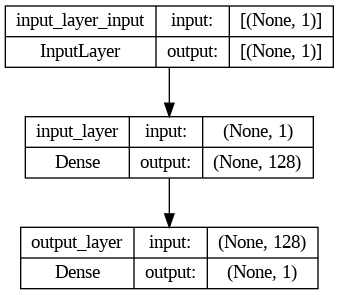

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model_2, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus model predictions).

In [29]:
# Make some predictions
y_pred = model_2.predict(X_test)
y_pred

1/1 [==============================] - 0s 53ms/step


array([[ 72.89684 ],
       [ 77.74717 ],
       [ 82.59749 ],
       [ 87.44781 ],
       [ 92.298134],
       [ 97.148445],
       [101.99874 ],
       [106.84905 ],
       [111.69935 ],
       [116.54966 ]], dtype=float32)

In [30]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to create a function for it.

In [31]:
# Let's create a plotting a function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  '''
  Plots training data, testing data, and compares the predictions to the ground truth labels.
  '''
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training")
  # Plot testing data in red
  plt.scatter(test_data, test_labels, c="lightgreen", label="Testing")
  # Plot the predictions in green
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()
  # Show the plot
  plt.show();

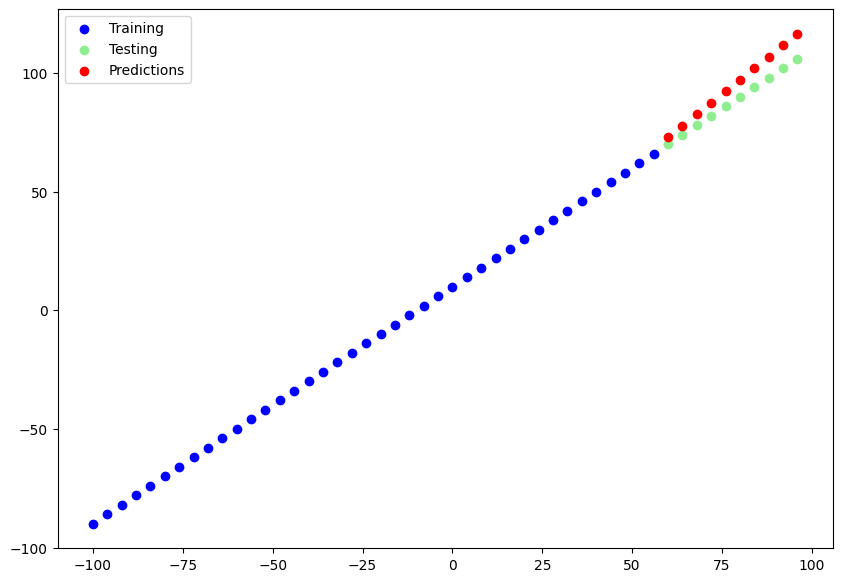

In [32]:
plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression metrics

Depending on the problem you're working on, there will be different evaluation metrics your model's performance.

Since we're working on a regression, two of the main metrics:
* **MAE** - mean absolute error, "on average, how wrong is each of my model's predictions"

`(tf.keras.losses.MAE())`
`tf.keras.losses.mean_absolute_error`
* **MSE** - mean square error, "square the average errors"

`tf.keras.losses.MSE()`
`tf.keras.losses.mean_squared_error`

In [33]:
# Evaluate the model on the test
model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 150ms/step - loss: 6.7233 - mae: 6.7233


[6.723268985748291, 6.723268985748291]

In [34]:
# Calculate the mean absolute error
mae = tf.keras.losses.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(tf.constant(y_pred)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.723269>

In [35]:
y_pred

array([[ 72.89684 ],
       [ 77.74717 ],
       [ 82.59749 ],
       [ 87.44781 ],
       [ 92.298134],
       [ 97.148445],
       [101.99874 ],
       [106.84905 ],
       [111.69935 ],
       [116.54966 ]], dtype=float32)

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [37]:
# Calculate the mean squared error
mse = tf.keras.losses.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(tf.constant(y_pred)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=51.16735>

🔑**Note:** Combination of MSE and MAE is called Huber Loss. Less sensitive to outliers than MSE

`tf.keras.losses.Huber()`

In [38]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.mean_absolute_error(y_true=y_true,
                                             y_pred=y_pred)

def mse(y_true, y_pred):
  return tf.keras.losses.mean_squared_error(y_true=y_true,
                                            y_pred=y_pred)

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it
-> evaluate it -> tweak it -> fit it -> evaluate it - > repeat
```

1. Get more data - get more examples to train on (more opportunities to learn patterns or relationships b/w features and labels).
2. Make your model larger (using more complex model) - this might come in form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 3 layers, trained for 500 epochs

**Build `model_1`**

In [39]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 7.6200 - mae: 7.6200
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 8.2367 - mae: 8.2367
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3280 - mae: 10.3280
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 12.7489 - mae: 12.7489
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 11.7944 - mae: 11.7944
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9131 - mae: 10.9131
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.6671 - mae: 8.6671
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 7.7415 - mae: 7.7415
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.8848 - mae: 19.8848
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 13.7344 - mae: 13.7344
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 48ms/step


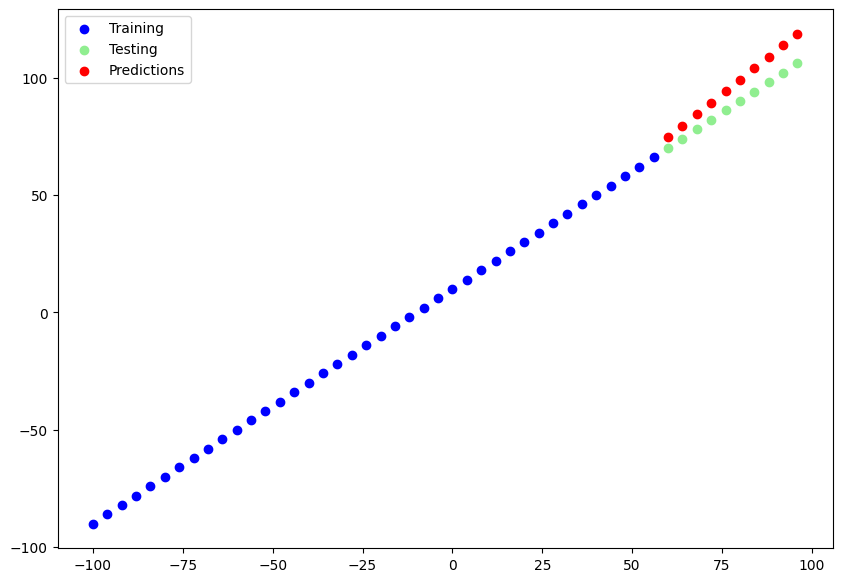

In [40]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_preds_1)

In [41]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(tf.constant(y_preds_1)))
mse_1 = mse(y_test, tf.squeeze(tf.constant(y_preds_1)))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.627173>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.94013>)

**Build `model_2`

* 2 dense layers trained for 100 epochs

In [42]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 4153.4805 - mse: 4153.4805
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 492.0801 - mse: 492.0801
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 345.6018 - mse: 345.6018
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 203.3341 - mse: 203.3341
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 106.8667 - mse: 106.8667
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 60.1821 - mse: 60.1821
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 43.2447 - mse: 43.2447
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 34.3999 - mse: 34.3999
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 41.8187 - mse: 41.8187
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 26.9374 - mse: 26.9374
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 99ms/step


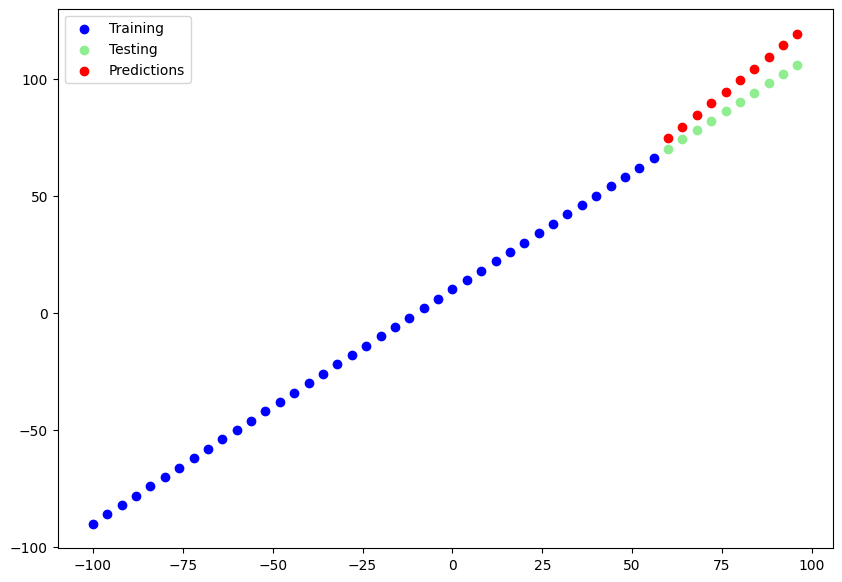

In [43]:
# Make and plot predictions for model_1
y_preds_2 = model_2.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_preds_2)

In [44]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, tf.squeeze(tf.constant(y_preds_2)))
mse_2 = mse(y_test, tf.squeeze(tf.constant(y_preds_2)))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=8.815245>,
 <tf.Tensor: shape=(), dtype=float32, numpy=85.24426>)

**Build `model_3`**
* 3 layers, trained for 500 epochs

In [45]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 11ms/step - loss: 36.4948 - mae: 36.4948
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 34.0379 - mae: 34.0379
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 31.4150 - mae: 31.4150
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 28.8630 - mae: 28.8630
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 26.0649 - mae: 26.0649
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 23.0838 - mae: 23.0838
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 19.5769 - mae: 19.5769
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 16.2655 - mae: 16.2655
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 13.6366 - mae: 13.6366
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 12.9850 - mae: 12.9850
Epoch 11/500
2/2 [==============================] - 0s 7m

1/1 [==============================] - 0s 125ms/step


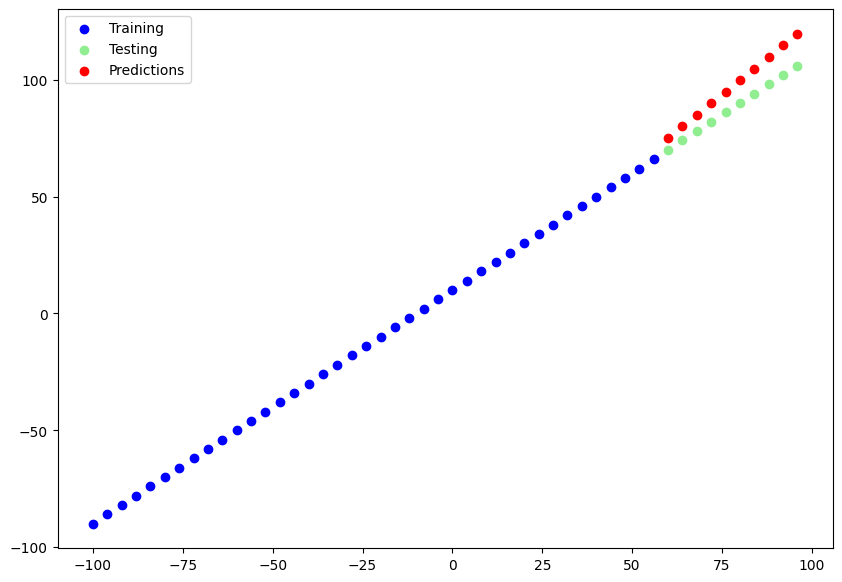

In [46]:
# Make and plot some predictions
y_preds_3 = model_3.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_preds_3)

In [47]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, tf.squeeze(tf.constant(y_preds_3)))
mse_3 = mse(y_test, tf.squeeze(tf.constant(y_preds_3)))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=9.3447075>,
 <tf.Tensor: shape=(), dtype=float32, numpy=94.872696>)

🔑**Note:** Start with small experiments (small models) and make sure they work and scale up the complexity

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [48]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

model_results = pd.DataFrame(model_results,
                             columns=['model', 'mae', 'mse'])
model_results

,model,mae,mse
0,model_1,8.627173,80.940132
1,model_2,8.815245,85.244263
2,model_3,9.344707,94.872696


`model_2` performed the best.

In [49]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                32        
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑**Note:** One of the main goals should be to minimize the time between the experiments performed, the more things can be figured out what does work and what doesn't, Remember the ML Practioner's moto: 'Experiment, Experiment, Experiment...'

### Tracking your experiments

One really good habit in machine learning modelling is to track the results of the experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, There are tools to help us!

📖**Resource:** As you build more models, you will want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (We'll see this one later).
* Weights and Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

### Saving our Models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [50]:
# Save model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [51]:
# Save model using the HDF5
model_2.save('best_model_HDF5_format.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading a Saved model

In [52]:
# Load in the SavedModel format
loaded_saved_format_model = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_saved_format_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                32        
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                32        
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# Compare model_2 preds with SavedModel format model preds
model_2_preds = model_2.predict(tf.expand_dims(X_test, axis=-1))
loaded_saved_format_model_preds = loaded_saved_format_model.predict(tf.expand_dims(X_test, axis=-1))
model_2_preds == loaded_saved_format_model_preds

1/1 [==============================] - 0s 57ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [55]:
mae(y_test, tf.squeeze(tf.constant(model_2_preds))) == mae(y_test, tf.squeeze(tf.constant(loaded_saved_format_model_preds)))

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [56]:
# Load in a model using the .h5 format
loaded_h5_format_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_format_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                32        
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# Compare the model_2 preds with loaded .h5 model preds
loaded_h5_format_model_preds = loaded_h5_format_model.predict(tf.expand_dims(X_test, axis=-1))
model_2_preds == loaded_h5_format_model_preds

1/1 [==============================] - 0s 54ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [58]:
mae(y_test, tf.squeeze(tf.constant(model_2_preds))) == mae(y_test, tf.squeeze(tf.constant(loaded_h5_format_model_preds)))

<tf.Tensor: shape=(), dtype=bool, numpy=True>